17_Data.csv 파일을 가져와 아래의 미션을 수행하시오.

해당 데이터는 N 모바일 게임사에서 출시한 A 게임에 대한 유저들의 행동을 나타낸 데이터이다.

1. '전체가입유저' 중 'N일차'에 접속한 유저의 비율 계산하고자 한다. 아래의 리스트를 이용하여, 각 일차별 잔존율을 계산하시오. (1일 /3일/5일/7일/9일/11일/14일의 잔존율)             
connection_status= ['1일차접속여부', '3일차접속여부', '5일차접속여부',
       '7일차접속여부', '9일차접속여부', '11일차접속여부', '14일차접속여부']          
2. 'os타입'별 각 일차별 잔존율을 계산하시오.
3. 1일차에 접속한 이력이 있는 유저들의 연속형 데이터 기술통계량을 확인
4. 1일차부터 14일차까지 모두 접속한 유저의 '최종클리어스테이지'분포를 시각화 (histogram or boxplot)
5. '최종클리어스테이지'에 빈도수를 확인하고, 유저들이 많이 남아 있는 스테이지 10개를 확인
6. '최종클리어스테이지'를 아래의 기준으로 '스테이지구분'이라는 파생변수를 생성
    - 0 스테이지 : 0
    - 1~5스테이지 : 1
    - 6~10스테이지: 2
    - 11~15스테이지: 3
    - 16~ 스테이지 초과 :4
    
7. (구매지표에 대한 분석을 하고자 한다.) 가입당일 과금을 하여 몰입한 고객을 분석하고자 한다. 1일차에 접속한 유저들의 구매 비율(전체 대비, 아이템 구매를 한 유저의 비율)을 계산하시오. (구매이력이 있으면, 구매횟수에 데이터가 있음)
8. 1일차에 접속한 고객들이, 아이템을 구매했을때, (구매이력이 있을때, 즉 구매횟수가 존재할 때) '최종클리어스테이지'가 어디까지 도달했는지, 분포를 Box Plot으로 시각화하시오.
9. '스테이지구분'별 유저들의 '구매횟수'의 합과 평균을 계산하시오.
10. 1일 부터 14일 까지 모두 접속한 고객을 'VIP' / 나머지 고객을 'normal'로 'Target'이라는 변수명으로 선언하여, 고객의 정보와 재화 사용 이력을 입력했을 때, 'VIP'와 'normal'을 분류하는 분류 모델을 생성하시오.
    - X : 'os타입', '국가','사용아이템수', '루비교환에사용된현금', '캐릭터개방에사용된현금', '스테이지개방에사용된현금','루비충전에사용된현금', '가챠뽑기에사용된현금'
    - Y : Target
    - 학습 데이터와 검증 데이터는 7:3으로 분할
    - 배웠던 특성 공학 기법을 적용하여 모델 구성 (impute / scaling / encoding / cross validation / hyperparameter tuning / oversampling / feature selection )

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
df1 = pd.read_csv("실습 파일/17_Data.csv")
del df1['Unnamed: 0']
df1

,os타입,국가,로그인타입,1일차접속여부,3일차접속여부,5일차접속여부,7일차접속여부,9일차접속여부,11일차접속여부,14일차접속여부,...,획득아이템수,사용아이템수,루비교환에사용된현금,캐릭터개방에사용된현금,스테이지개방에사용된현금,루비충전에사용된현금,가챠뽑기에사용된현금,스테이지_내_구매현금,구매상품명,구매횟수
0,Android,JP,LINE,0,0,0,0,0,0,0,...,41,41,0,0,0,0,0,32,NaN,NaN
1,Android,TH,LINE,1,0,0,0,0,0,0,...,12,8,0,0,0,0,0,0,NaN,NaN
2,iOS,TW,LINE,1,1,1,1,1,1,1,...,17,17,0,0,0,0,0,6,NaN,NaN
3,iOS,TW,LINE,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,NaN,NaN
4,iOS,TW,LINE,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55804,iOS,TW,Guest,1,0,0,0,0,0,0,...,7,7,0,0,0,0,0,0,NaN,NaN
55805,Android,TH,LINE,1,1,0,1,1,1,1,...,16,11,0,0,0,0,0,0,NaN,NaN
55806,Android,JP,LINE,1,1,1,0,0,1,0,...,22,18,0,0,0,0,0,0,NaN,NaN
55807,iOS,TW,Guest,1,1,0,0,0,0,0,...,14,9,0,0,0,0,0,0,NaN,NaN


In [3]:
df1.isnull().sum()

os타입                0
국가                  0
로그인타입               0
1일차접속여부             0
3일차접속여부             0
5일차접속여부             0
7일차접속여부             0
9일차접속여부             0
11일차접속여부            0
14일차접속여부            0
최종클리어스테이지       14485
마지막도전스테이지           0
획득아이템수              0
사용아이템수              0
루비교환에사용된현금          0
캐릭터개방에사용된현금         0
스테이지개방에사용된현금        0
루비충전에사용된현금          0
가챠뽑기에사용된현금          0
스테이지_내_구매현금         0
구매상품명           55556
구매횟수            55556
dtype: int64

In [4]:
# '1. 전체가입유저' 중 'N일차'에 접속한 유저의 비율 계산하고자 한다. 
# 아래의 리스트를 이용하여, 각 일차별 잔존율을 계산하시오. (1일 /3일/5일/7일/9일/11일/14일의 잔존율)

connection_status= ['1일차접속여부', '3일차접속여부', '5일차접속여부', '7일차접속여부', 
                    '9일차접속여부', '11일차접속여부', '14일차접속여부']

for i in connection_status:
    print(f"{i} : ",df1[i].sum()/len(df1))

1일차접속여부 :  0.4310595065312046
3일차접속여부 :  0.2981956315289649
5일차접속여부 :  0.25700155888835136
7일차접속여부 :  0.2402121521618377
9일차접속여부 :  0.2181547779032056
11일차접속여부 :  0.2059166084323317
14일차접속여부 :  0.1989464064935763


In [5]:
#  2.'os타입'별 각 일차별 잔존율을 계산하시오.
df1['os타입'].unique()

array(['Android', 'iOS'], dtype=object)

In [6]:
sample1 = df1[df1['os타입']=='Android']
sample2 = df1[df1['os타입']=='iOS']

connection_status= ['1일차접속여부', '3일차접속여부', '5일차접속여부', '7일차접속여부', 
                    '9일차접속여부', '11일차접속여부', '14일차접속여부']

for i in connection_status:
    print(f"Android {i} : ",sample1[i].sum()/len(sample1), f"   iOS {i} : ",sample2[i].sum()/len(sample2))

Android 1일차접속여부 :  0.4340559220860823    iOS 1일차접속여부 :  0.4270820301096793
Android 3일차접속여부 :  0.2899151743638077    iOS 3일차접속여부 :  0.3091872054714542
Android 5일차접속여부 :  0.2424756519007226    iOS 5일차접속여부 :  0.27628341465448936
Android 7일차접속여부 :  0.22387684574300973    iOS 7일차접속여부 :  0.26189582551399143
Android 9일차접속여부 :  0.20245051837888783    iOS 9일차접속여부 :  0.23900079235998165
Android 11일차접속여부 :  0.19095193213949105    iOS 11일차접속여부 :  0.22578089161349515
Android 14일차접속여부 :  0.18526547282437952    iOS 14일차접속여부 :  0.2171066349722674


In [7]:
# 3. 1일차에 접속한 이력이 있는 유저들의 연속형 데이터 기술통계량을 확인
df1[df1['1일차접속여부']==1].describe()

,1일차접속여부,3일차접속여부,5일차접속여부,7일차접속여부,9일차접속여부,11일차접속여부,14일차접속여부,최종클리어스테이지,마지막도전스테이지,획득아이템수,사용아이템수,루비교환에사용된현금,캐릭터개방에사용된현금,스테이지개방에사용된현금,루비충전에사용된현금,가챠뽑기에사용된현금,스테이지_내_구매현금,구매횟수
count,24057.0,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,20752.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,203.000000
mean,1.0,0.583988,0.504843,0.469801,0.433304,0.406784,0.388993,22.375723,19.105458,27.104668,23.552189,0.028682,0.448934,0.004988,0.938604,2.410733,3.754375,1.192118
std,0.0,0.492906,0.499987,0.499098,0.495542,0.491244,0.487532,28.555554,26.906865,26.354477,26.511241,0.690817,4.258013,0.244613,5.865435,14.108534,48.601158,1.673183
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.000000,13.000000,19.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,27.000000,36.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,851.000000,852.000000,321.000000,321.000000,40.000000,80.000000,12.000000,140.000000,840.000000,2098.000000,24.000000


<Axes: xlabel='최종클리어스테이지', ylabel='Count'>

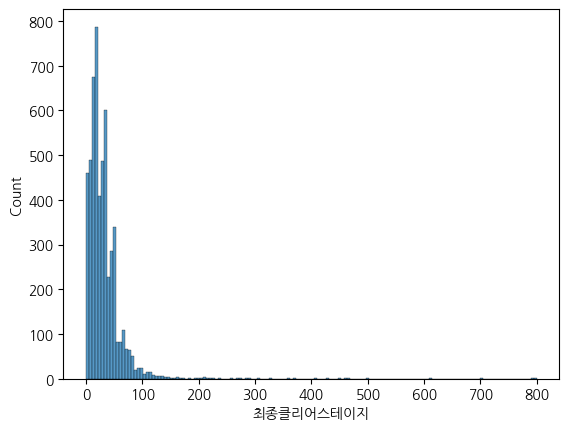

In [66]:
# 4. 1일차부터 14일차까지 모두 접속한 유저의 '최종클리어스테이지'분포를 시각화 (histogram or boxplot)
sample = df1[df1[connection_status].sum(axis=1)==7]
sns.histplot(data = sample, x= '최종클리어스테이지', bins=150)

In [9]:
# 5. '최종클리어스테이지'에 빈도수를 확인하고, 유저들이 많이 남아 있는 스테이지 10개를 확인
df1.최종클리어스테이지.value_counts().sort_values(ascending=False).head(10)

최종클리어스테이지
10.0    4767
1.0     4141
11.0    2754
2.0     1805
4.0     1713
15.0    1645
3.0     1592
5.0     1385
0.0     1357
6.0     1210
Name: count, dtype: int64

In [69]:
# 6. '최종클리어스테이지'를 아래의 기준으로 '스테이지구분'이라는 파생변수를 생성
# 0 스테이지 : 0
# 1~5스테이지 : 1
# 6~10스테이지: 2
# 11~15스테이지: 3
# 16~ 스테이지 초과 :4

def func(x):
    if x == 0:
        return 0
    elif x<=5:
        return 1
    elif x<=10:
        return 2
    elif x<=15:
        return 3
    elif x>=16:
        return 4

df1['스테이지구분'] = df1['최종클리어스테이지'].apply(func)
df1['스테이지구분']

0        4.0
1        2.0
2        3.0
3        NaN
4        2.0
        ... 
55804    1.0
55805    3.0
55806    3.0
55807    2.0
55808    1.0
Name: 스테이지구분, Length: 55809, dtype: float64

In [11]:
# 7. (구매지표에 대한 분석을 하고자 한다.) 가입당일 과금을 하여 몰입한 고객을 분석하고자 한다. 
# 1일차에 접속한 유저들의 구매 비율(전체 대비, 아이템 구매를 한 유저의 비율)을 계산하시오. 
# (구매이력이 있으면, 구매횟수에 데이터가 있음)

sample = df1[df1['1일차접속여부']==1]
sample

,os타입,국가,로그인타입,1일차접속여부,3일차접속여부,5일차접속여부,7일차접속여부,9일차접속여부,11일차접속여부,14일차접속여부,...,사용아이템수,루비교환에사용된현금,캐릭터개방에사용된현금,스테이지개방에사용된현금,루비충전에사용된현금,가챠뽑기에사용된현금,스테이지_내_구매현금,구매상품명,구매횟수,스테이지구분
1,Android,TH,LINE,1,0,0,0,0,0,0,...,8,0,0,0,0,0,0,NaN,NaN,2.0
2,iOS,TW,LINE,1,1,1,1,1,1,1,...,17,0,0,0,0,0,6,NaN,NaN,3.0
6,iOS,SG,LINE,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
8,Android,TW,LINE,1,1,1,1,1,1,1,...,100,0,0,0,0,35,0,NaN,NaN,4.0
12,Android,JP,LINE,1,0,0,1,1,0,0,...,9,0,0,0,0,0,0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55803,Android,TH,LINE,1,1,1,1,1,0,0,...,5,0,0,0,0,0,0,NaN,NaN,1.0
55804,iOS,TW,Guest,1,0,0,0,0,0,0,...,7,0,0,0,0,0,0,NaN,NaN,1.0
55805,Android,TH,LINE,1,1,0,1,1,1,1,...,11,0,0,0,0,0,0,NaN,NaN,3.0
55806,Android,JP,LINE,1,1,1,0,0,1,0,...,18,0,0,0,0,0,0,NaN,NaN,3.0


In [12]:
len(sample[sample['구매횟수']>0])/len(sample)

0.008438292388909674

<Axes: xlabel='최종클리어스테이지'>

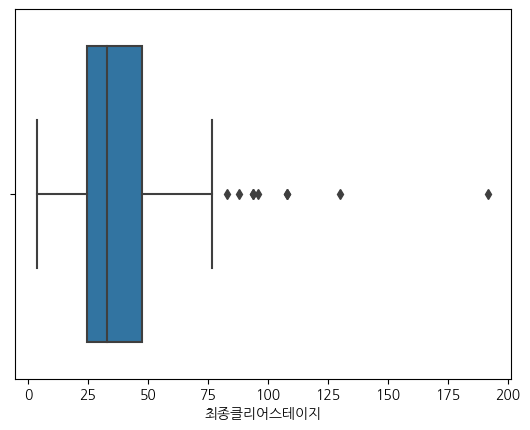

In [13]:
# 8. 1일차에 접속한 고객들이, 아이템을 구매했을때, (구매이력이 있을때, 즉 구매횟수가 존재할 때) 
# '최종클리어스테이지'가 어디까지 도달했는지, 분포를 Box Plot으로 시각화하시오.

sample2 = sample[sample['구매횟수']>0]
sns.boxplot(x = "최종클리어스테이지",  data = sample2)

In [70]:
# 9. '스테이지구분'별 유저들의 '구매횟수'의 합과 평균을 계산하시오.
df2 = pd.read_csv('실습 파일/17_Data.csv')
df2['스테이지구분'] = df2['최종클리어스테이지'].apply(func)
df2.pivot_table(index='스테이지구분', values='구매횟수', aggfunc=['sum','mean'])

,sum,mean
,구매횟수,구매횟수
스테이지구분,,
0.0,0.0,NaN
1.0,4.0,1.00000
2.0,12.0,1.00000
3.0,39.0,1.00000
4.0,237.0,1.19697


In [17]:
# 10. 1일 부터 14일 까지 모두 접속한 고객을 'VIP' / 나머지 고객을 'normal'로 'Target'이라는 변수명으로 선언하여, 
# 고객의 정보와 재화 사용 이력을 입력했을 때, 'VIP'와 'normal'을 분류하는 분류 모델을 생성하시오.
connection_status= ['1일차접속여부', '3일차접속여부', '5일차접속여부', '7일차접속여부', 
                '9일차접속여부', '11일차접속여부', '14일차접속여부']

df1["Target"] = ""

sample1 = df1[df1[connection_status].sum(axis=1)<7].index
sample2 = df1[df1[connection_status].sum(axis=1)==7].index

df1.iloc[sample1,-1] = 'normal'
df1.iloc[sample2,-1] = 'VIP'
df1

,os타입,국가,로그인타입,1일차접속여부,3일차접속여부,5일차접속여부,7일차접속여부,9일차접속여부,11일차접속여부,14일차접속여부,...,루비교환에사용된현금,캐릭터개방에사용된현금,스테이지개방에사용된현금,루비충전에사용된현금,가챠뽑기에사용된현금,스테이지_내_구매현금,구매상품명,구매횟수,스테이지구분,Target
0,Android,JP,LINE,0,0,0,0,0,0,0,...,0,0,0,0,0,32,NaN,NaN,4.0,normal
1,Android,TH,LINE,1,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,2.0,normal
2,iOS,TW,LINE,1,1,1,1,1,1,1,...,0,0,0,0,0,6,NaN,NaN,3.0,VIP
3,iOS,TW,LINE,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,normal
4,iOS,TW,LINE,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,2.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55804,iOS,TW,Guest,1,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,1.0,normal
55805,Android,TH,LINE,1,1,0,1,1,1,1,...,0,0,0,0,0,0,NaN,NaN,3.0,normal
55806,Android,JP,LINE,1,1,1,0,0,1,0,...,0,0,0,0,0,0,NaN,NaN,3.0,normal
55807,iOS,TW,Guest,1,1,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,2.0,normal


In [50]:
# X : 'os타입', '국가','사용아이템수', '루비교환에사용된현금', '캐릭터개방에사용된현금', '스테이지개방에사용된현금','루비충전에사용된현금', '가챠뽑기에사용된현금'
# Y : Target
# 학습 데이터와 검증 데이터는 7:3으로 분할
# 배웠던 특성 공학 기법을 적용하여 모델 구성 
# (impute / scaling / encoding / cross validation / hyperparameter tuning / oversampling / feature selection )

variable = ['os타입', '국가','사용아이템수', '루비교환에사용된현금', '캐릭터개방에사용된현금', 
            '스테이지개방에사용된현금','루비충전에사용된현금', '가챠뽑기에사용된현금']

X = df1[variable]
y = df1['Target']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55809 entries, 0 to 55808
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   os타입          55809 non-null  object
 1   국가            55809 non-null  object
 2   사용아이템수        55809 non-null  int64 
 3   루비교환에사용된현금    55809 non-null  int64 
 4   캐릭터개방에사용된현금   55809 non-null  int64 
 5   스테이지개방에사용된현금  55809 non-null  int64 
 6   루비충전에사용된현금    55809 non-null  int64 
 7   가챠뽑기에사용된현금    55809 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 3.4+ MB


In [51]:
y.value_counts()

Target
normal    50125
VIP        5684
Name: count, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek
from sklearn.metrics  import classification_report

variable = ['os타입', '국가','사용아이템수', '루비교환에사용된현금', '캐릭터개방에사용된현금', 
            '스테이지개방에사용된현금','루비충전에사용된현금', '가챠뽑기에사용된현금']

X = df1[variable]
y = df1['Target']

encoder = LabelEncoder()

box = []
X['os타입'] = encoder.fit_transform(X['os타입'])
box.append(encoder.classes_)
X['국가'] = encoder.fit_transform(X['국가'])
box.append(encoder.classes_)

X = X.to_numpy()
y = y.to_numpy()

model = SMOTETomek()
X,y = model.fit_resample(X,y)

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.3)

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

report = classification_report(test_y, dt.predict(test_x))
print(report)

C:\Users\campus2H018\AppData\Local\Temp\ipykernel_14888\962526626.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['os타입'] = encoder.fit_transform(X['os타입'])
C:\Users\campus2H018\AppData\Local\Temp\ipykernel_14888\962526626.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['국가'] = encoder.fit_transform(X['국가'])


              precision    recall  f1-score   support

         VIP       0.76      0.75      0.76     14941
      normal       0.76      0.77      0.76     15100

    accuracy                           0.76     30041
   macro avg       0.76      0.76      0.76     30041
weighted avg       0.76      0.76      0.76     30041



In [56]:
print(dt.score(train_x, train_y))
print(dt.score(test_x, test_y))

0.7712610389054542
0.760660430744649


In [62]:
variable = ['os타입', '국가','사용아이템수', '루비교환에사용된현금', '캐릭터개방에사용된현금', 
            '스테이지개방에사용된현금','루비충전에사용된현금', '가챠뽑기에사용된현금']

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = df1[variable]
y = df1['Target']

encoder = LabelEncoder()

box = []
X['os타입'] = encoder.fit_transform(X['os타입'])
box.append(encoder.classes_)
X['국가'] = encoder.fit_transform(X['국가'])
box.append(encoder.classes_)

X = X.to_numpy()
y = y.to_numpy()

model = SMOTETomek()
X,y = model.fit_resample(X,y)

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.3)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

knc = KNeighborsClassifier()
knc.fit(train_scaled, train_y)

report = classification_report(test_y, knc.predict(test_scaled))
print(report)

C:\Users\campus2H018\AppData\Local\Temp\ipykernel_14888\3335578813.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['os타입'] = encoder.fit_transform(X['os타입'])
C:\Users\campus2H018\AppData\Local\Temp\ipykernel_14888\3335578813.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['국가'] = encoder.fit_transform(X['국가'])


              precision    recall  f1-score   support

         VIP       0.72      0.69      0.71     15095
      normal       0.70      0.73      0.71     14938

    accuracy                           0.71     30033
   macro avg       0.71      0.71      0.71     30033
weighted avg       0.71      0.71      0.71     30033



In [64]:
print(knc.score(train_scaled, train_y))
print(knc.score(test_scaled, test_y))

0.7199937211924027
0.7101521659507875
